In [2]:

from datetime import datetime
from patsy import dmatrices
from xgboost import XGBRegressor, plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataFrame = pd.read_csv('../Data/dados_limpos.csv')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataFrame

,total_sprints,tempo_resolucao,parent_SA-114,parent_SA-116,parent_SA-117,parent_SA-2,parent_SA-2859,parent_SA-3,parent_SA-3012,parent_SA-3642,parent_SA-3702,parent_SA-3887,parent_SA-3947,parent_SA-420,assignee_Donavan Marques,assignee_Jean Carlos,assignee_Yan Fagundes,devs_Carlos Pasquali,devs_Jean Carlos,devs_Jorge Andrade,devs_Kauã Librelato da Costa,devs_Luiz Gustavo,devs_Thiago Meller Casagrande,issue_type_Bug,issue_type_Task
0,1,26954,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,1,26698,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,28118,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,1,155527,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4,1,155516,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,1,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
6,1,115435,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7,1,12156,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
8,1,291168,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
9,1,2856,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [5]:
dataFrame = dataFrame.rename(columns={'devs_Carlos Pasquali': 'devs_CarlosPasquali'})
dataFrame = dataFrame.rename(columns={'parent_SA-114': 'parent_SA_114'})
dataFrame = dataFrame.rename(columns={'parent_SA-116': 'parent_SA_116','parent_SA-117': 'parent_SA_117','parent_SA-2': 'parent_SA_2','parent_SA-2859': 'parent_SA_2859','parent_SA-3': 'parent_SA_3','parent_SA-3012': 'parent_SA_3012','parent_SA-3642': 'parent_SA_3642','parent_SA-3702': 'parent_SA_3702','parent_SA-3887': 'parent_SA_3887','parent_SA-3947': 'parent_SA_3947','parent_SA-420': 'parent_SA_420','assignee_Donavan Marques': 'assignee_DonavanMarques','assignee_Jean Carlos': 'assignee_JeanCarlos','assignee_Yan Fagundes': 'assignee_YanFagundes','devs_Jean Carlos': 'devs_JeanCarlos','devs_Jorge Andrade': 'devs_JorgeAndrade','devs_Kauã Librelato da Costa': 'devs_KauãLibrelatodaCosta','devs_Luiz Gustavo': 'devs_LuizGustavo','devs_Thiago Meller Casagrande': 'devs_ThiagoMellerCasagrande'})

In [6]:
dataFrame

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,parent_SA_3702,parent_SA_3887,parent_SA_3947,parent_SA_420,assignee_DonavanMarques,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
0,1,26954,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,1,26698,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,28118,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,1,155527,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4,1,155516,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,1,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
6,1,115435,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7,1,12156,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
8,1,291168,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
9,1,2856,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [7]:
#devs_CarlosPasquali

Text(0.5, 1.0, 'Tempo de resolução')

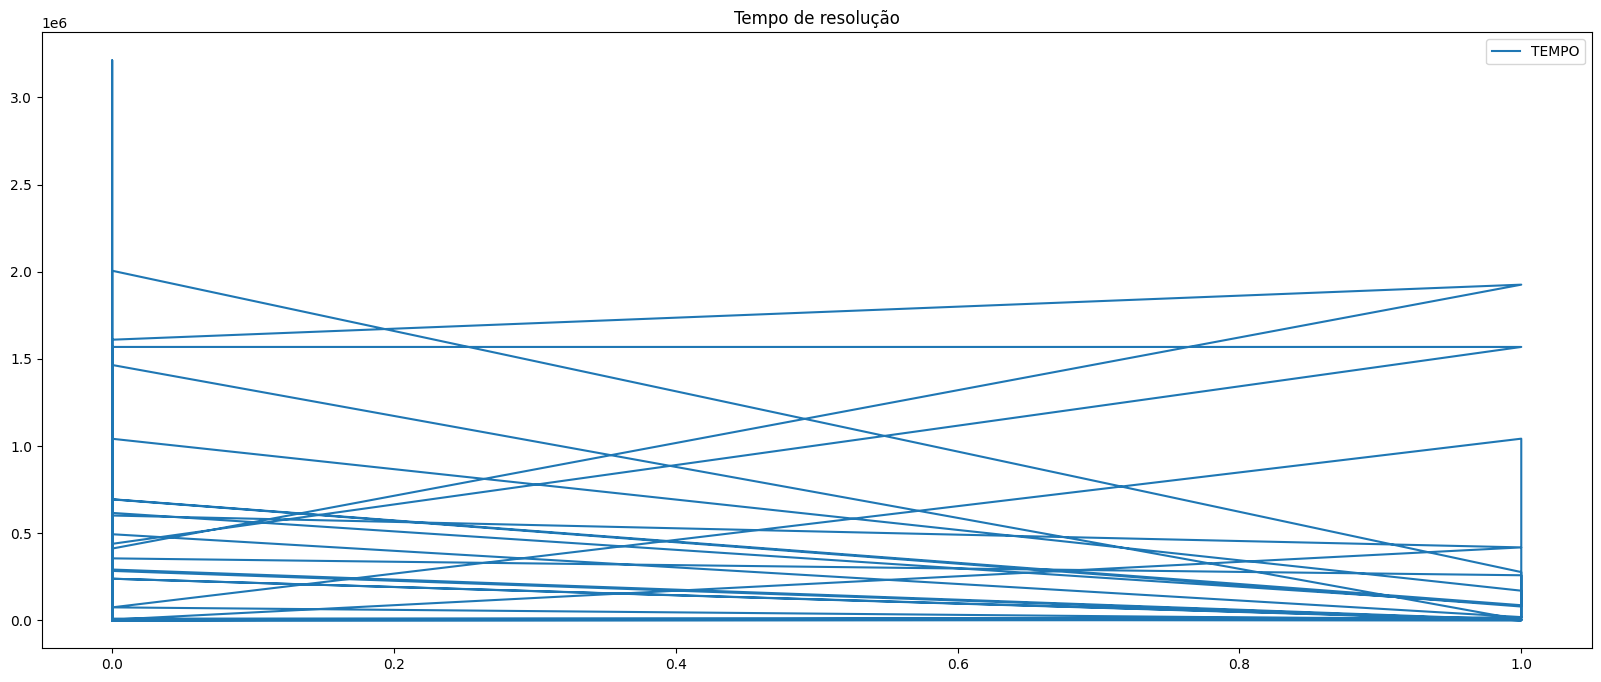

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_CarlosPasquali'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [9]:
dataFrame.corr()


,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,parent_SA_3702,parent_SA_3887,parent_SA_3947,parent_SA_420,assignee_DonavanMarques,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.351922,0.044276,0.162621,-0.118664,-0.123625,0.323463,0.027264,0.065619,0.005410,0.140035,-0.109145,0.031017,0.052214,0.184203,-0.066465,-0.145661,0.065328,-0.152222,-0.062270,0.050165,0.149449,-0.066465,-0.037134,0.096420
tempo_resolucao,0.351922,1.000000,-0.025579,0.017780,-0.115665,-0.039653,0.062303,0.211538,-0.006651,0.008414,-0.199929,-0.105111,-0.040141,0.227990,0.260750,-0.021757,-0.189266,-0.138947,0.018138,0.003775,0.174250,-0.035867,-0.097554,0.075540,-0.212453
parent_SA_114,0.044276,-0.025579,1.000000,-0.043850,-0.056810,-0.118958,-0.026435,-0.065837,-0.034340,-0.021518,-0.061430,-0.061430,-0.026435,-0.051917,-0.067976,-0.026435,0.190757,-0.089703,-0.098965,-0.100795,0.349164,-0.080144,-0.026435,0.226303,-0.175175
parent_SA_116,0.162621,0.017780,-0.043850,1.000000,-0.066015,-0.138233,-0.030718,-0.076505,-0.039904,-0.025004,-0.071383,-0.071383,-0.030718,-0.060330,-0.078990,-0.030718,0.052338,-0.104238,-0.115000,-0.117127,-0.125586,0.547141,-0.030718,-0.079583,0.136852
parent_SA_117,-0.118664,-0.115665,-0.056810,-0.066015,1.000000,-0.179088,-0.039797,-0.099116,-0.051698,-0.032394,-0.092480,-0.092480,-0.039797,-0.078160,-0.102336,-0.039797,0.287179,0.396897,-0.148989,0.068368,-0.162704,-0.120655,-0.039797,-0.068966,0.143374
parent_SA_2,-0.123625,-0.039653,-0.118958,-0.138233,-0.179088,1.000000,-0.083333,-0.207544,-0.108253,-0.067832,-0.193649,-0.193649,-0.083333,-0.163663,-0.214286,0.222222,0.519675,-0.282778,0.731000,-0.317744,-0.276631,0.094742,0.222222,0.162704,-0.004975
parent_SA_2859,0.323463,0.062303,-0.026435,-0.030718,-0.039797,-0.083333,1.000000,-0.046121,-0.024056,-0.015074,-0.043033,-0.043033,-0.018519,-0.036370,0.388889,-0.018519,-0.138580,-0.062839,-0.069328,-0.070610,0.244600,-0.056143,-0.018519,0.158532,-0.122715
parent_SA_3,0.027264,0.211538,-0.065837,-0.076505,-0.099116,-0.207544,-0.046121,1.000000,-0.059913,-0.037542,-0.107175,-0.107175,-0.046121,-0.090579,0.840639,-0.046121,-0.265378,0.157773,-0.172662,0.360578,-0.188556,-0.139827,-0.046121,0.152797,-0.265539
parent_SA_3012,0.065619,-0.006651,-0.034340,-0.039904,-0.051698,-0.108253,-0.024056,-0.059913,1.000000,-0.019582,-0.055902,-0.055902,-0.024056,-0.047246,-0.061859,-0.024056,0.173591,-0.081631,-0.090059,0.340693,-0.098349,-0.072932,-0.024056,0.062865,-0.017234
parent_SA_3642,0.005410,0.008414,-0.021518,-0.025004,-0.032394,-0.067832,-0.015074,-0.037542,-0.019582,1.000000,-0.035028,-0.035028,-0.015074,-0.029604,-0.038761,-0.015074,-0.002014,-0.051151,-0.056432,-0.057476,-0.061627,0.268488,-0.015074,-0.095084,0.122836


In [10]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=135
Teste=30


In [11]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')



In [12]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

ImportError: sklearn needs to be installed in order to use this module

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

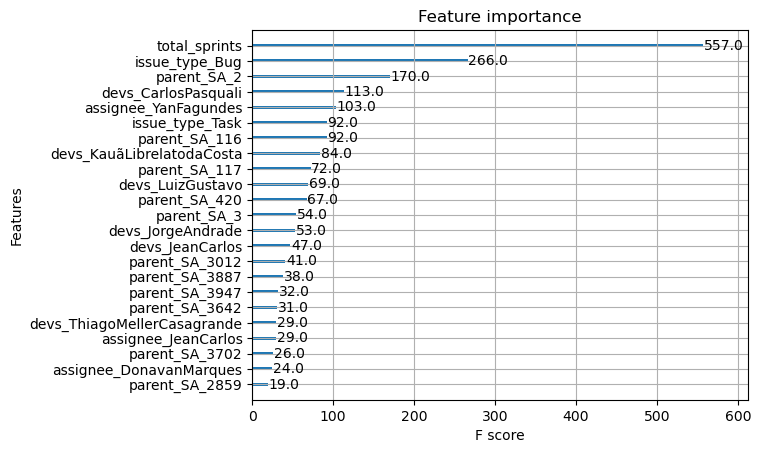

In [ ]:
plot_importance(model)

In [ ]:
score = model.score(X_treino, y_treino)
score

0.9281018691271326

In [ ]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

25

Text(0.5, 1.0, 'Tempo sprint')

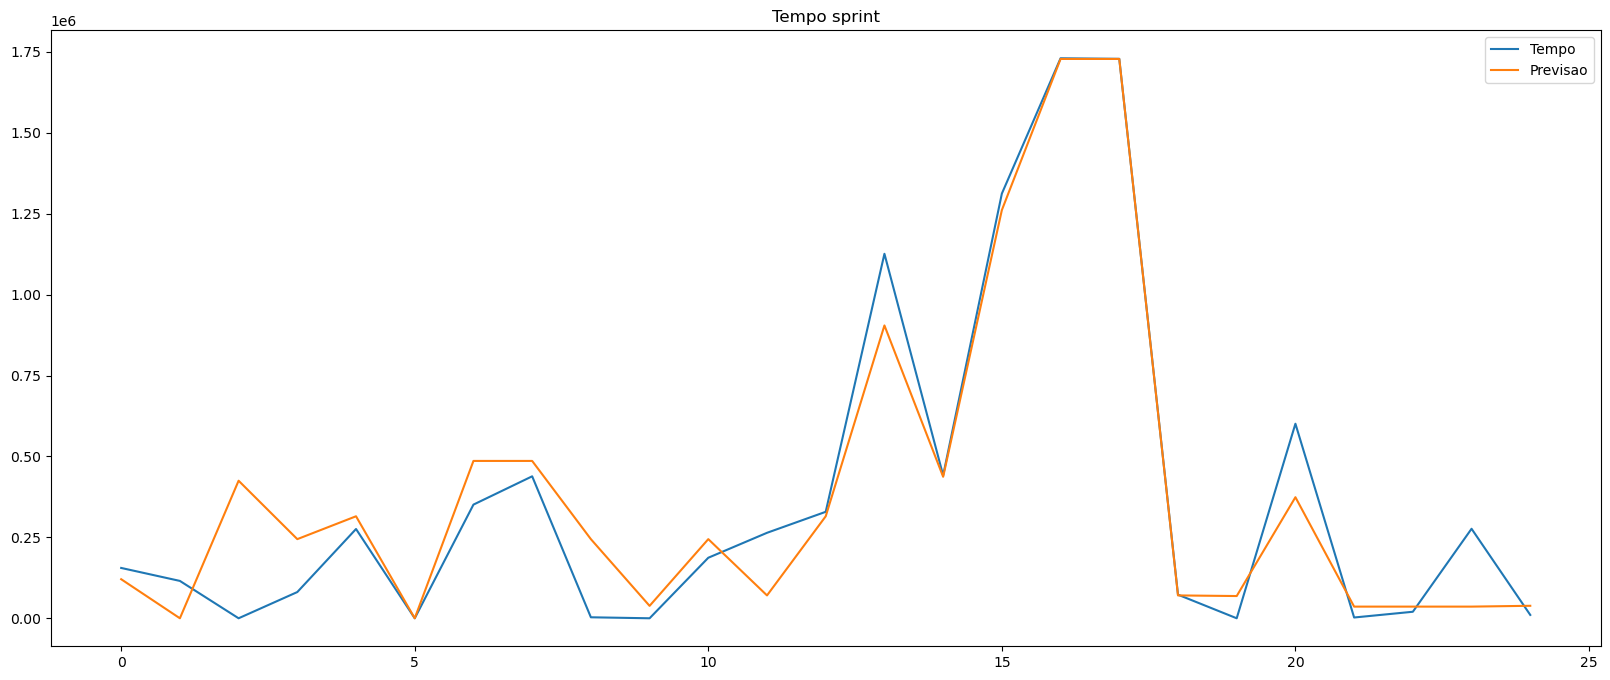

In [ ]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [ ]:
#devs_JeanCarlos

Text(0.5, 1.0, 'Tempo de resolução')

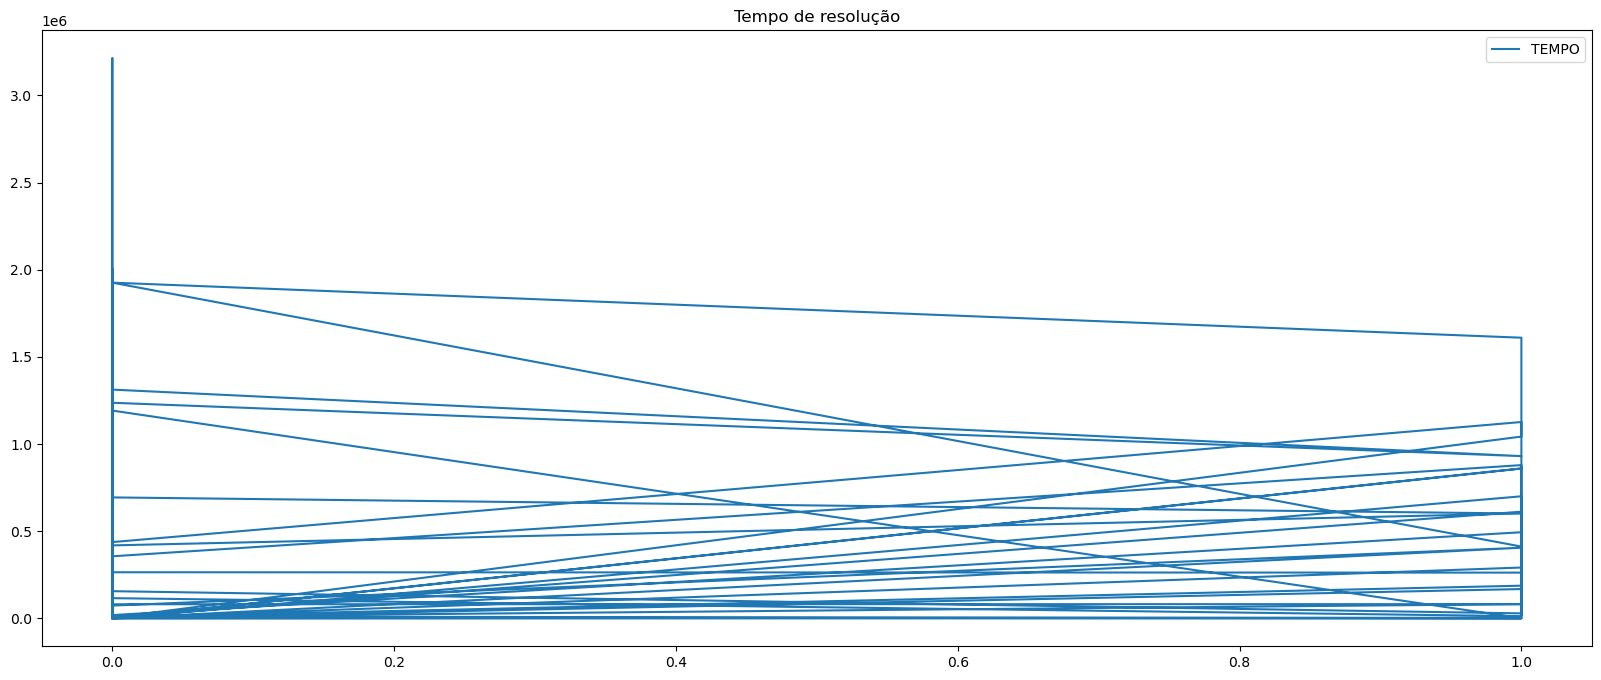

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_JeanCarlos'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [ ]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,parent_SA_3702,parent_SA_3887,parent_SA_3947,parent_SA_420,assignee_DonavanMarques,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.351922,0.044276,0.162621,-0.118664,-0.123625,0.323463,0.027264,0.065619,0.005410,0.140035,-0.109145,0.031017,0.052214,0.184203,-0.066465,-0.145661,0.065328,-0.152222,-0.062270,0.050165,0.149449,-0.066465,-0.037134,0.096420
tempo_resolucao,0.351922,1.000000,-0.025579,0.017780,-0.115665,-0.039653,0.062303,0.211538,-0.006651,0.008414,-0.199929,-0.105111,-0.040141,0.227990,0.260750,-0.021757,-0.189266,-0.138947,0.018138,0.003775,0.174250,-0.035867,-0.097554,0.075540,-0.212453
parent_SA_114,0.044276,-0.025579,1.000000,-0.043850,-0.056810,-0.118958,-0.026435,-0.065837,-0.034340,-0.021518,-0.061430,-0.061430,-0.026435,-0.051917,-0.067976,-0.026435,0.190757,-0.089703,-0.098965,-0.100795,0.349164,-0.080144,-0.026435,0.226303,-0.175175
parent_SA_116,0.162621,0.017780,-0.043850,1.000000,-0.066015,-0.138233,-0.030718,-0.076505,-0.039904,-0.025004,-0.071383,-0.071383,-0.030718,-0.060330,-0.078990,-0.030718,0.052338,-0.104238,-0.115000,-0.117127,-0.125586,0.547141,-0.030718,-0.079583,0.136852
parent_SA_117,-0.118664,-0.115665,-0.056810,-0.066015,1.000000,-0.179088,-0.039797,-0.099116,-0.051698,-0.032394,-0.092480,-0.092480,-0.039797,-0.078160,-0.102336,-0.039797,0.287179,0.396897,-0.148989,0.068368,-0.162704,-0.120655,-0.039797,-0.068966,0.143374
parent_SA_2,-0.123625,-0.039653,-0.118958,-0.138233,-0.179088,1.000000,-0.083333,-0.207544,-0.108253,-0.067832,-0.193649,-0.193649,-0.083333,-0.163663,-0.214286,0.222222,0.519675,-0.282778,0.731000,-0.317744,-0.276631,0.094742,0.222222,0.162704,-0.004975
parent_SA_2859,0.323463,0.062303,-0.026435,-0.030718,-0.039797,-0.083333,1.000000,-0.046121,-0.024056,-0.015074,-0.043033,-0.043033,-0.018519,-0.036370,0.388889,-0.018519,-0.138580,-0.062839,-0.069328,-0.070610,0.244600,-0.056143,-0.018519,0.158532,-0.122715
parent_SA_3,0.027264,0.211538,-0.065837,-0.076505,-0.099116,-0.207544,-0.046121,1.000000,-0.059913,-0.037542,-0.107175,-0.107175,-0.046121,-0.090579,0.840639,-0.046121,-0.265378,0.157773,-0.172662,0.360578,-0.188556,-0.139827,-0.046121,0.152797,-0.265539
parent_SA_3012,0.065619,-0.006651,-0.034340,-0.039904,-0.051698,-0.108253,-0.024056,-0.059913,1.000000,-0.019582,-0.055902,-0.055902,-0.024056,-0.047246,-0.061859,-0.024056,0.173591,-0.081631,-0.090059,0.340693,-0.098349,-0.072932,-0.024056,0.062865,-0.017234
parent_SA_3642,0.005410,0.008414,-0.021518,-0.025004,-0.032394,-0.067832,-0.015074,-0.037542,-0.019582,1.000000,-0.035028,-0.035028,-0.015074,-0.029604,-0.038761,-0.015074,-0.002014,-0.051151,-0.056432,-0.057476,-0.061627,0.268488,-0.015074,-0.095084,0.122836


In [ ]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=132
Teste=33


In [ ]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [ ]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

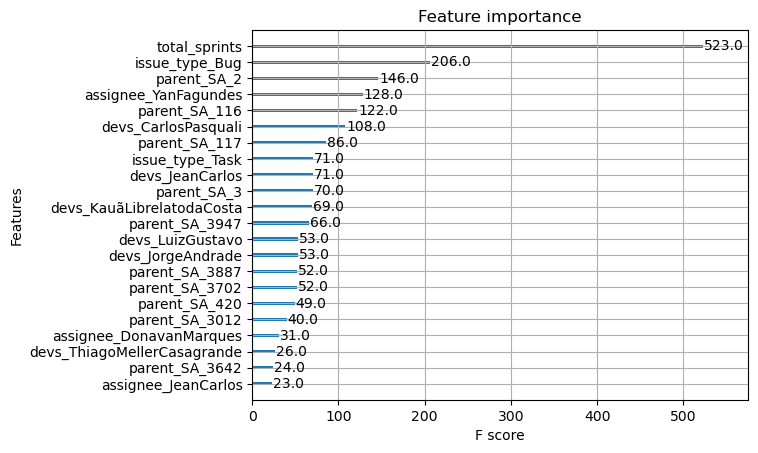

In [ ]:
plot_importance(model)

In [ ]:
score = model.score(X_treino, y_treino)
score

0.9359114342849906

In [ ]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

33

Text(0.5, 1.0, 'Tempo sprint')

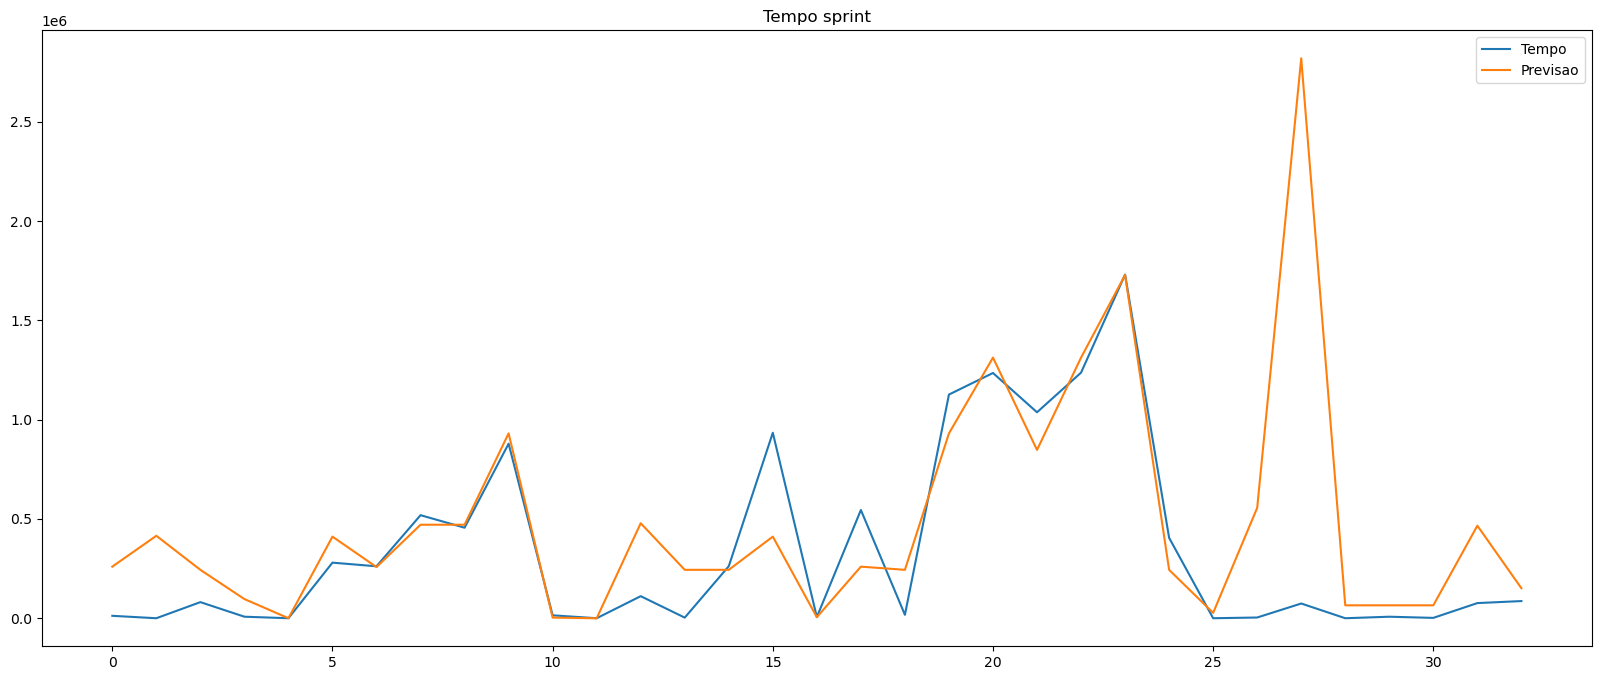

In [ ]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [ ]:
#devs_JorgeAndrade

Text(0.5, 1.0, 'Tempo de resolução')

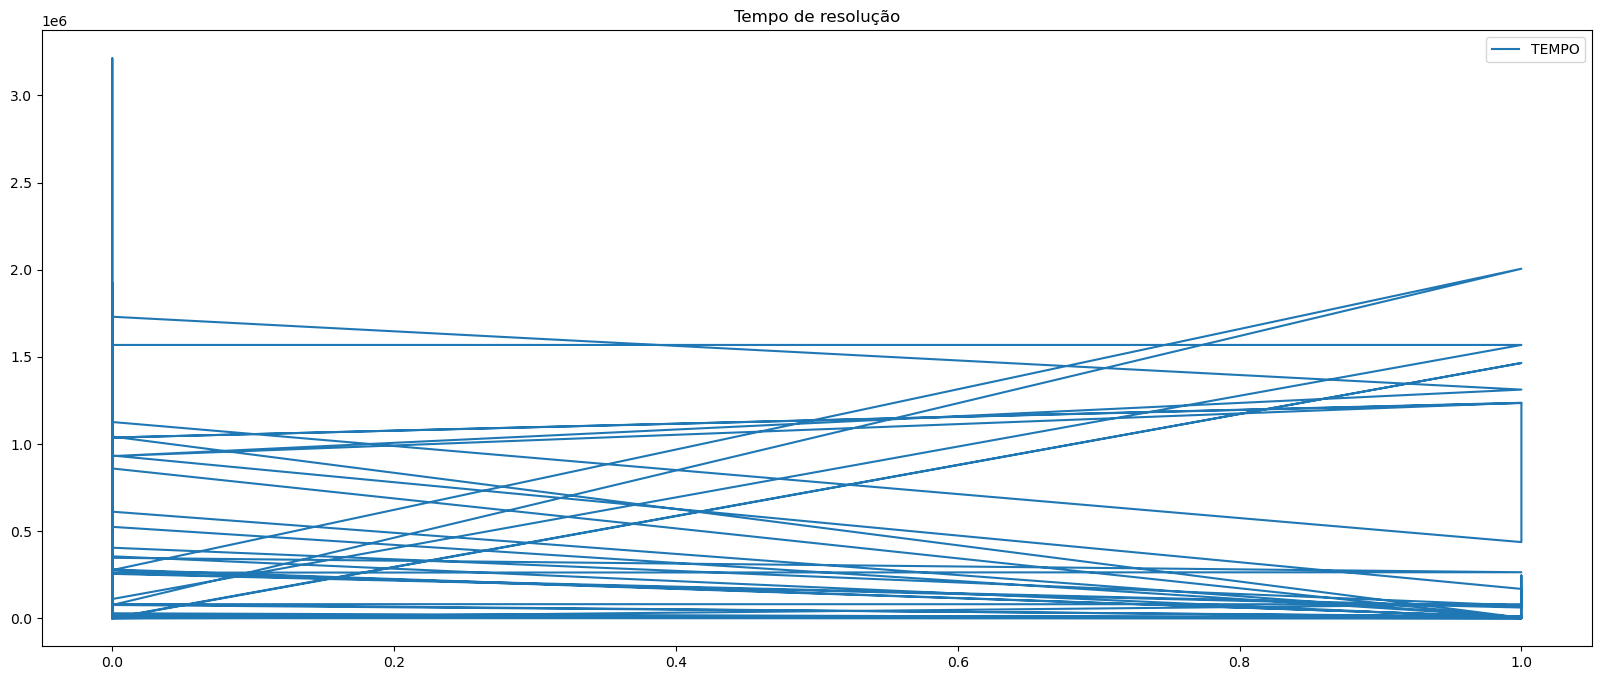

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_JorgeAndrade'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [ ]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,parent_SA_3702,parent_SA_3887,parent_SA_3947,parent_SA_420,assignee_DonavanMarques,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.351922,0.044276,0.162621,-0.118664,-0.123625,0.323463,0.027264,0.065619,0.005410,0.140035,-0.109145,0.031017,0.052214,0.184203,-0.066465,-0.145661,0.065328,-0.152222,-0.062270,0.050165,0.149449,-0.066465,-0.037134,0.096420
tempo_resolucao,0.351922,1.000000,-0.025579,0.017780,-0.115665,-0.039653,0.062303,0.211538,-0.006651,0.008414,-0.199929,-0.105111,-0.040141,0.227990,0.260750,-0.021757,-0.189266,-0.138947,0.018138,0.003775,0.174250,-0.035867,-0.097554,0.075540,-0.212453
parent_SA_114,0.044276,-0.025579,1.000000,-0.043850,-0.056810,-0.118958,-0.026435,-0.065837,-0.034340,-0.021518,-0.061430,-0.061430,-0.026435,-0.051917,-0.067976,-0.026435,0.190757,-0.089703,-0.098965,-0.100795,0.349164,-0.080144,-0.026435,0.226303,-0.175175
parent_SA_116,0.162621,0.017780,-0.043850,1.000000,-0.066015,-0.138233,-0.030718,-0.076505,-0.039904,-0.025004,-0.071383,-0.071383,-0.030718,-0.060330,-0.078990,-0.030718,0.052338,-0.104238,-0.115000,-0.117127,-0.125586,0.547141,-0.030718,-0.079583,0.136852
parent_SA_117,-0.118664,-0.115665,-0.056810,-0.066015,1.000000,-0.179088,-0.039797,-0.099116,-0.051698,-0.032394,-0.092480,-0.092480,-0.039797,-0.078160,-0.102336,-0.039797,0.287179,0.396897,-0.148989,0.068368,-0.162704,-0.120655,-0.039797,-0.068966,0.143374
parent_SA_2,-0.123625,-0.039653,-0.118958,-0.138233,-0.179088,1.000000,-0.083333,-0.207544,-0.108253,-0.067832,-0.193649,-0.193649,-0.083333,-0.163663,-0.214286,0.222222,0.519675,-0.282778,0.731000,-0.317744,-0.276631,0.094742,0.222222,0.162704,-0.004975
parent_SA_2859,0.323463,0.062303,-0.026435,-0.030718,-0.039797,-0.083333,1.000000,-0.046121,-0.024056,-0.015074,-0.043033,-0.043033,-0.018519,-0.036370,0.388889,-0.018519,-0.138580,-0.062839,-0.069328,-0.070610,0.244600,-0.056143,-0.018519,0.158532,-0.122715
parent_SA_3,0.027264,0.211538,-0.065837,-0.076505,-0.099116,-0.207544,-0.046121,1.000000,-0.059913,-0.037542,-0.107175,-0.107175,-0.046121,-0.090579,0.840639,-0.046121,-0.265378,0.157773,-0.172662,0.360578,-0.188556,-0.139827,-0.046121,0.152797,-0.265539
parent_SA_3012,0.065619,-0.006651,-0.034340,-0.039904,-0.051698,-0.108253,-0.024056,-0.059913,1.000000,-0.019582,-0.055902,-0.055902,-0.024056,-0.047246,-0.061859,-0.024056,0.173591,-0.081631,-0.090059,0.340693,-0.098349,-0.072932,-0.024056,0.062865,-0.017234
parent_SA_3642,0.005410,0.008414,-0.021518,-0.025004,-0.032394,-0.067832,-0.015074,-0.037542,-0.019582,1.000000,-0.035028,-0.035028,-0.015074,-0.029604,-0.038761,-0.015074,-0.002014,-0.051151,-0.056432,-0.057476,-0.061627,0.268488,-0.015074,-0.095084,0.122836


In [ ]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=133
Teste=32


In [ ]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [ ]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

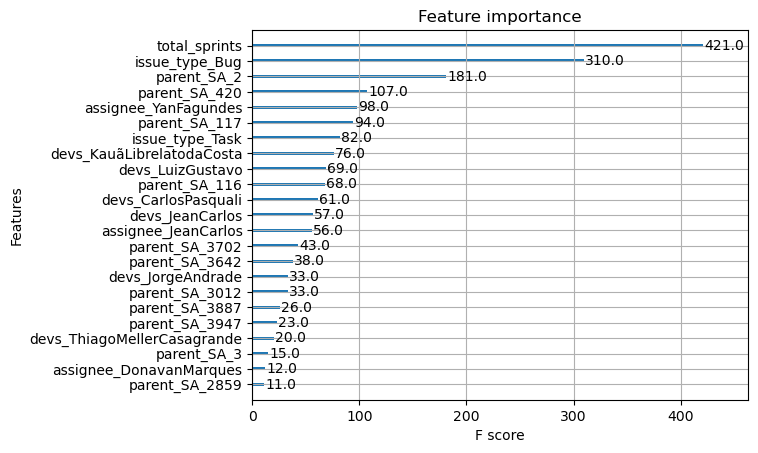

In [ ]:
plot_importance(model)

In [ ]:
score = model.score(X_treino, y_treino)
score

0.923730496095255

In [ ]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

32

Text(0.5, 1.0, 'Tempo sprint')

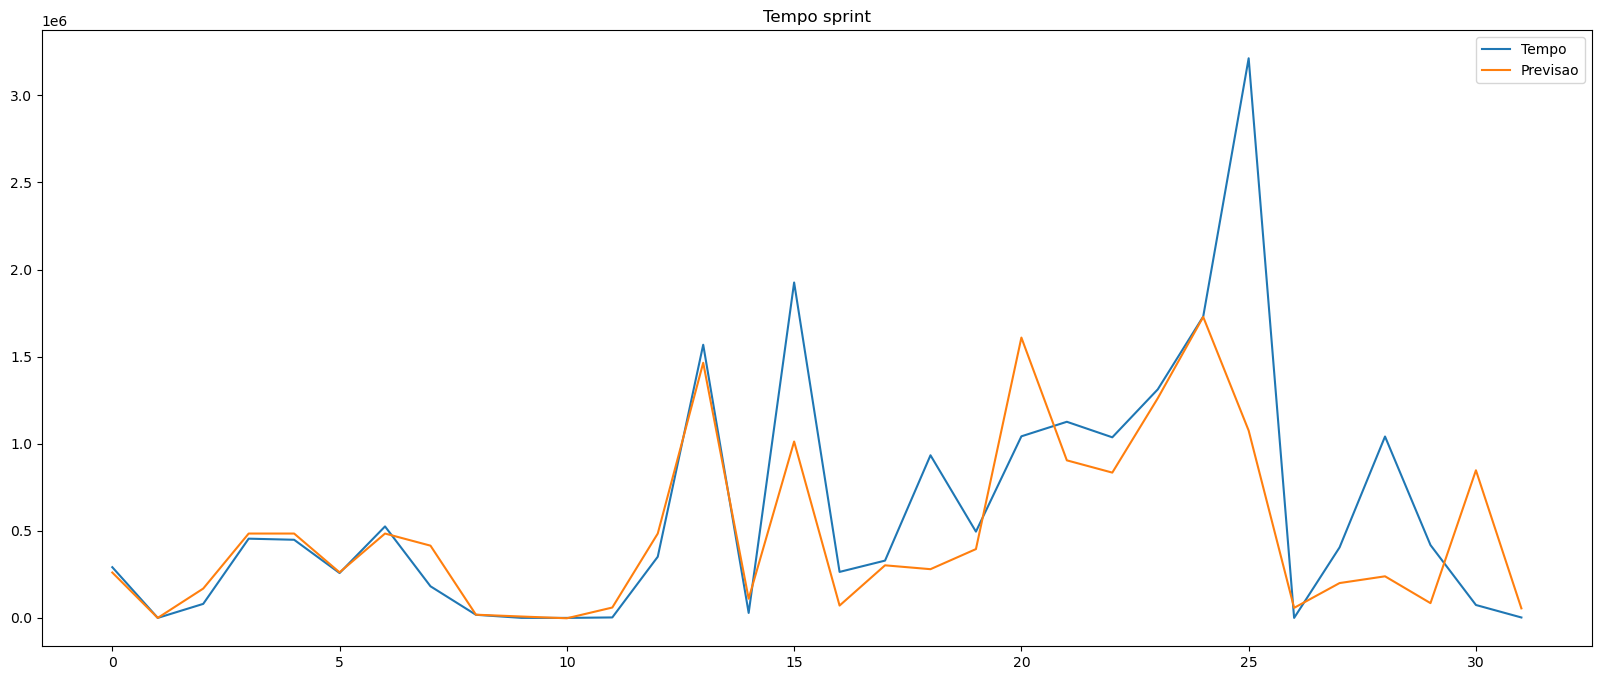

In [ ]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [ ]:
#devs_KauãLibrelatodaCosta

Text(0.5, 1.0, 'Tempo de resolução')

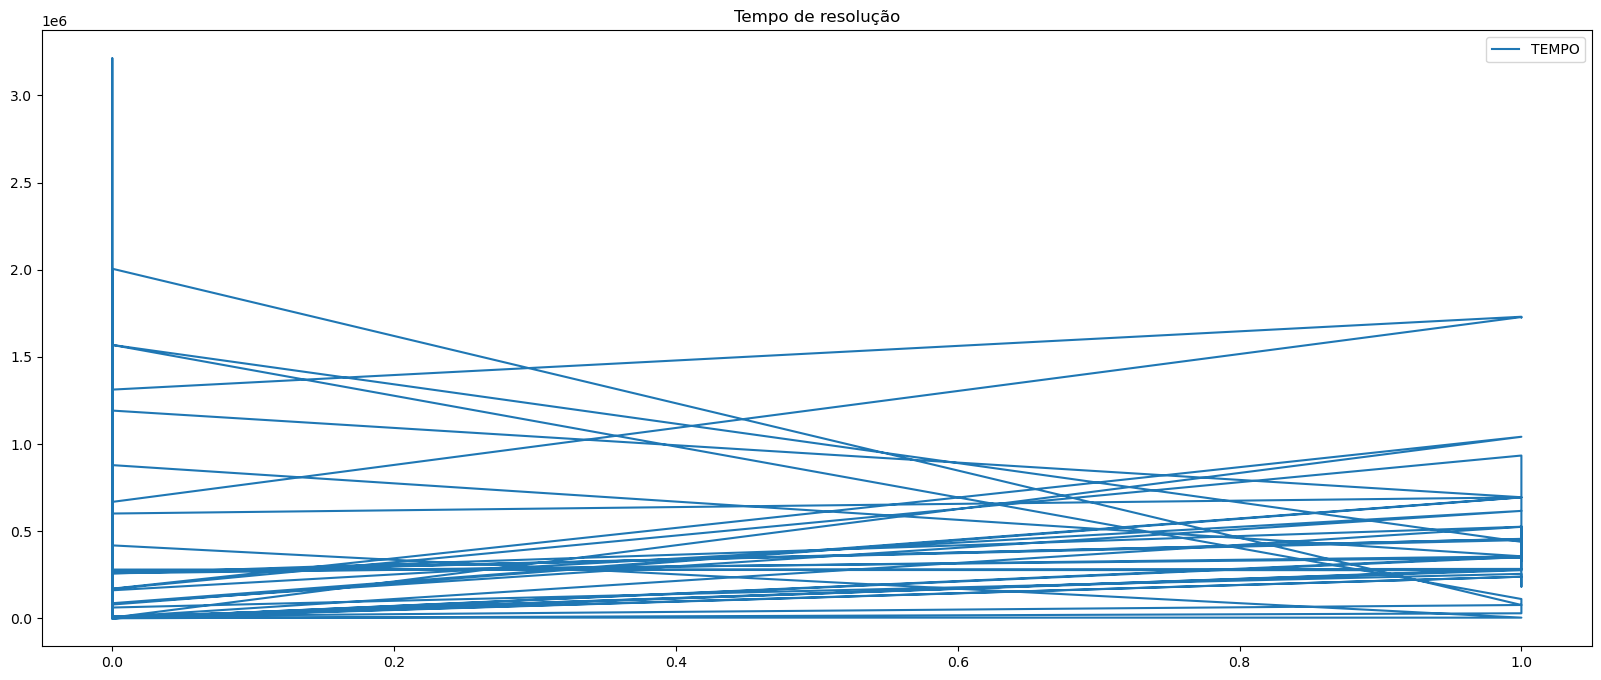

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_KauãLibrelatodaCosta'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [ ]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,parent_SA_3702,parent_SA_3887,parent_SA_3947,parent_SA_420,assignee_DonavanMarques,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.351922,0.044276,0.162621,-0.118664,-0.123625,0.323463,0.027264,0.065619,0.005410,0.140035,-0.109145,0.031017,0.052214,0.184203,-0.066465,-0.145661,0.065328,-0.152222,-0.062270,0.050165,0.149449,-0.066465,-0.037134,0.096420
tempo_resolucao,0.351922,1.000000,-0.025579,0.017780,-0.115665,-0.039653,0.062303,0.211538,-0.006651,0.008414,-0.199929,-0.105111,-0.040141,0.227990,0.260750,-0.021757,-0.189266,-0.138947,0.018138,0.003775,0.174250,-0.035867,-0.097554,0.075540,-0.212453
parent_SA_114,0.044276,-0.025579,1.000000,-0.043850,-0.056810,-0.118958,-0.026435,-0.065837,-0.034340,-0.021518,-0.061430,-0.061430,-0.026435,-0.051917,-0.067976,-0.026435,0.190757,-0.089703,-0.098965,-0.100795,0.349164,-0.080144,-0.026435,0.226303,-0.175175
parent_SA_116,0.162621,0.017780,-0.043850,1.000000,-0.066015,-0.138233,-0.030718,-0.076505,-0.039904,-0.025004,-0.071383,-0.071383,-0.030718,-0.060330,-0.078990,-0.030718,0.052338,-0.104238,-0.115000,-0.117127,-0.125586,0.547141,-0.030718,-0.079583,0.136852
parent_SA_117,-0.118664,-0.115665,-0.056810,-0.066015,1.000000,-0.179088,-0.039797,-0.099116,-0.051698,-0.032394,-0.092480,-0.092480,-0.039797,-0.078160,-0.102336,-0.039797,0.287179,0.396897,-0.148989,0.068368,-0.162704,-0.120655,-0.039797,-0.068966,0.143374
parent_SA_2,-0.123625,-0.039653,-0.118958,-0.138233,-0.179088,1.000000,-0.083333,-0.207544,-0.108253,-0.067832,-0.193649,-0.193649,-0.083333,-0.163663,-0.214286,0.222222,0.519675,-0.282778,0.731000,-0.317744,-0.276631,0.094742,0.222222,0.162704,-0.004975
parent_SA_2859,0.323463,0.062303,-0.026435,-0.030718,-0.039797,-0.083333,1.000000,-0.046121,-0.024056,-0.015074,-0.043033,-0.043033,-0.018519,-0.036370,0.388889,-0.018519,-0.138580,-0.062839,-0.069328,-0.070610,0.244600,-0.056143,-0.018519,0.158532,-0.122715
parent_SA_3,0.027264,0.211538,-0.065837,-0.076505,-0.099116,-0.207544,-0.046121,1.000000,-0.059913,-0.037542,-0.107175,-0.107175,-0.046121,-0.090579,0.840639,-0.046121,-0.265378,0.157773,-0.172662,0.360578,-0.188556,-0.139827,-0.046121,0.152797,-0.265539
parent_SA_3012,0.065619,-0.006651,-0.034340,-0.039904,-0.051698,-0.108253,-0.024056,-0.059913,1.000000,-0.019582,-0.055902,-0.055902,-0.024056,-0.047246,-0.061859,-0.024056,0.173591,-0.081631,-0.090059,0.340693,-0.098349,-0.072932,-0.024056,0.062865,-0.017234
parent_SA_3642,0.005410,0.008414,-0.021518,-0.025004,-0.032394,-0.067832,-0.015074,-0.037542,-0.019582,1.000000,-0.035028,-0.035028,-0.015074,-0.029604,-0.038761,-0.015074,-0.002014,-0.051151,-0.056432,-0.057476,-0.061627,0.268488,-0.015074,-0.095084,0.122836


In [ ]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=137
Teste=28


In [ ]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [ ]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

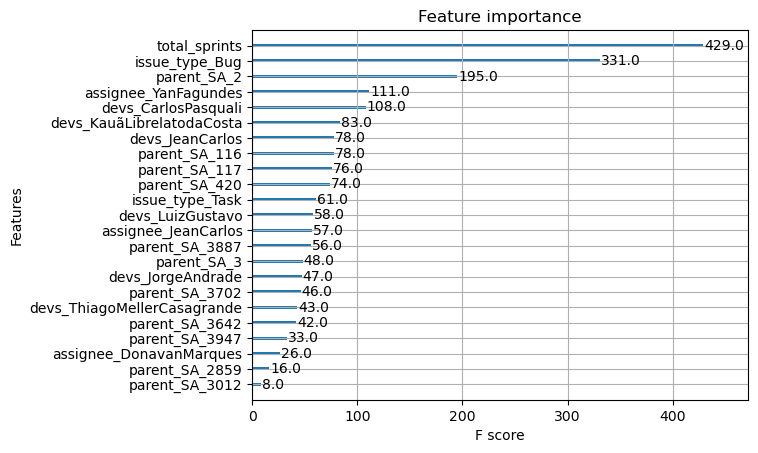

In [ ]:
plot_importance(model)

In [ ]:
score = model.score(X_treino, y_treino)
score

0.9277605953476608

In [ ]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

28

Text(0.5, 1.0, 'Tempo sprint')

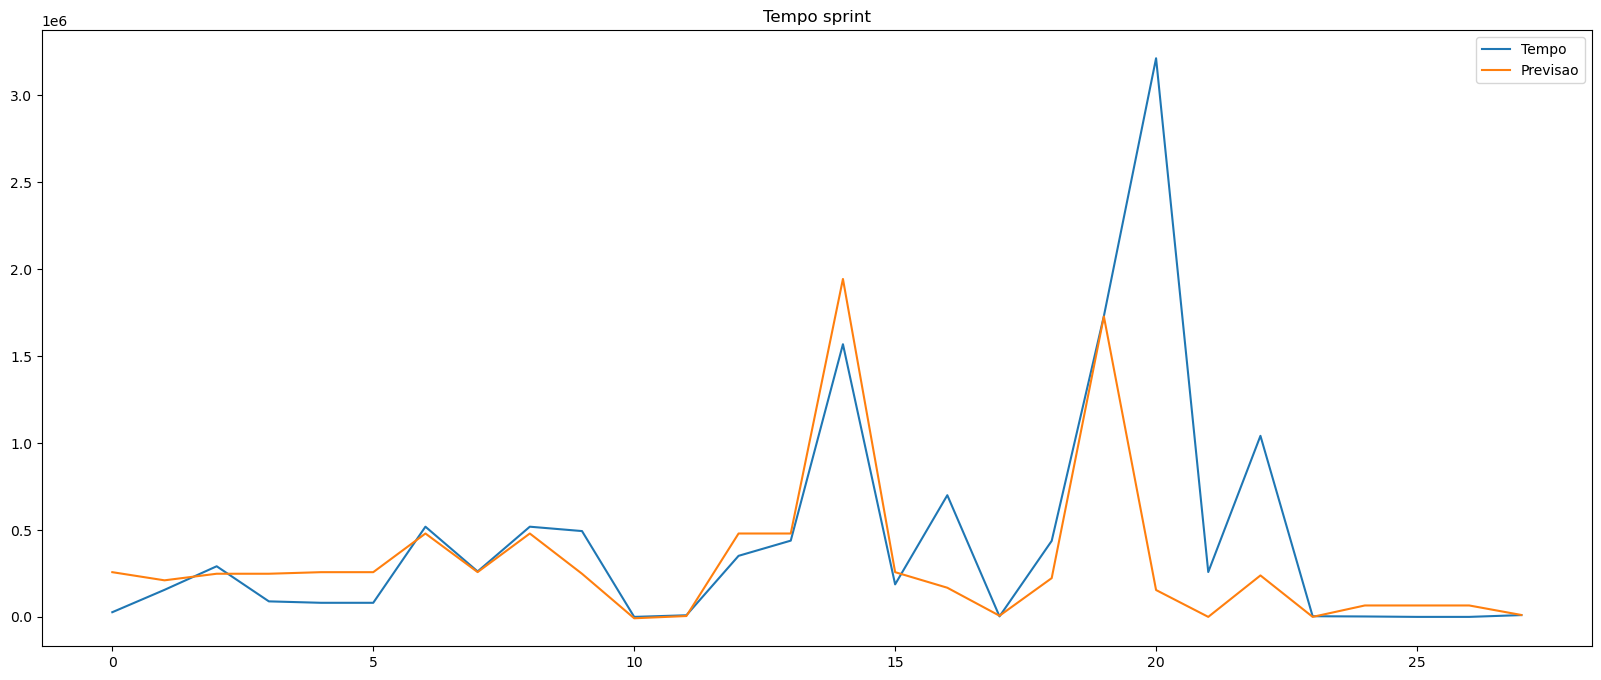

In [ ]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [ ]:
#devs_LuizGustavo

Text(0.5, 1.0, 'Tempo de resolução')

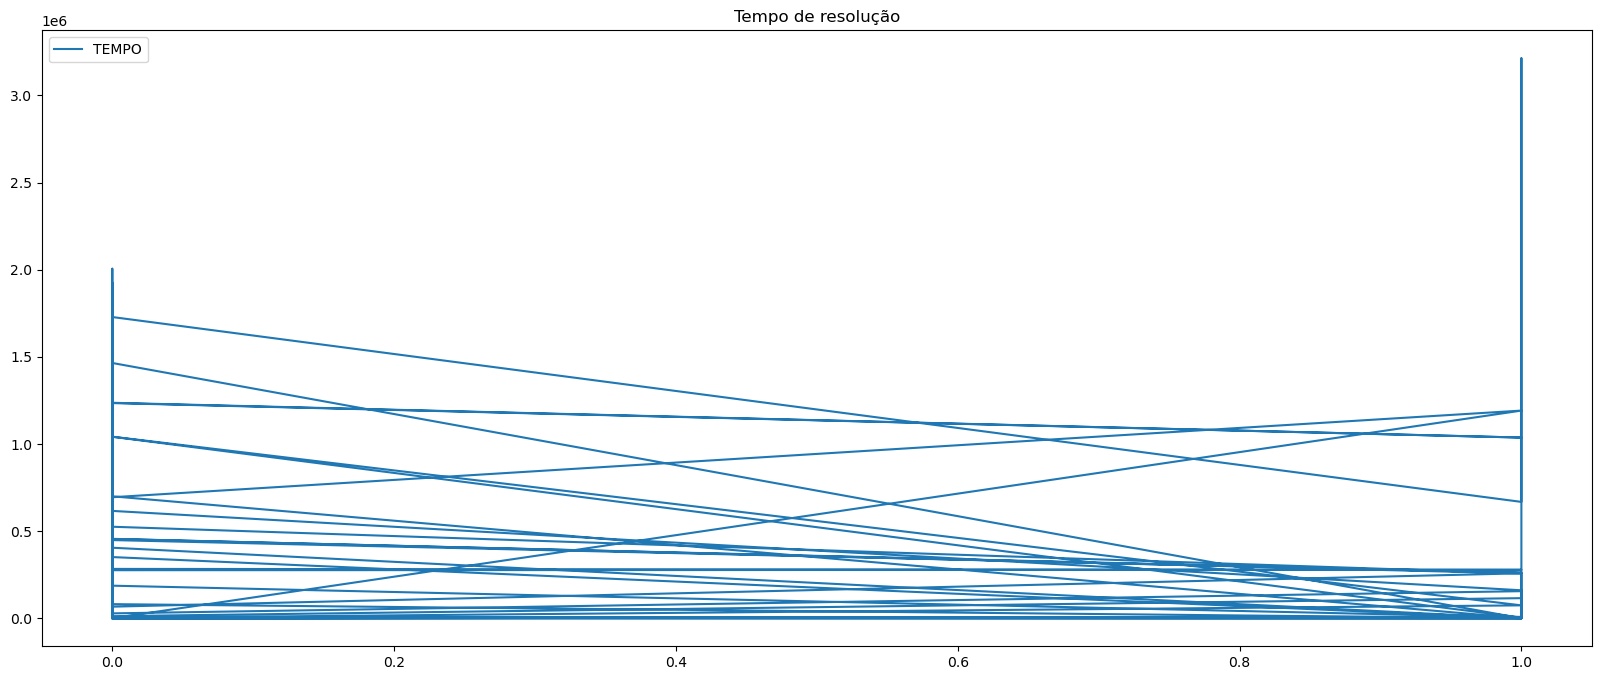

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_LuizGustavo'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [ ]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,parent_SA_3702,parent_SA_3887,parent_SA_3947,parent_SA_420,assignee_DonavanMarques,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.351922,0.044276,0.162621,-0.118664,-0.123625,0.323463,0.027264,0.065619,0.005410,0.140035,-0.109145,0.031017,0.052214,0.184203,-0.066465,-0.145661,0.065328,-0.152222,-0.062270,0.050165,0.149449,-0.066465,-0.037134,0.096420
tempo_resolucao,0.351922,1.000000,-0.025579,0.017780,-0.115665,-0.039653,0.062303,0.211538,-0.006651,0.008414,-0.199929,-0.105111,-0.040141,0.227990,0.260750,-0.021757,-0.189266,-0.138947,0.018138,0.003775,0.174250,-0.035867,-0.097554,0.075540,-0.212453
parent_SA_114,0.044276,-0.025579,1.000000,-0.043850,-0.056810,-0.118958,-0.026435,-0.065837,-0.034340,-0.021518,-0.061430,-0.061430,-0.026435,-0.051917,-0.067976,-0.026435,0.190757,-0.089703,-0.098965,-0.100795,0.349164,-0.080144,-0.026435,0.226303,-0.175175
parent_SA_116,0.162621,0.017780,-0.043850,1.000000,-0.066015,-0.138233,-0.030718,-0.076505,-0.039904,-0.025004,-0.071383,-0.071383,-0.030718,-0.060330,-0.078990,-0.030718,0.052338,-0.104238,-0.115000,-0.117127,-0.125586,0.547141,-0.030718,-0.079583,0.136852
parent_SA_117,-0.118664,-0.115665,-0.056810,-0.066015,1.000000,-0.179088,-0.039797,-0.099116,-0.051698,-0.032394,-0.092480,-0.092480,-0.039797,-0.078160,-0.102336,-0.039797,0.287179,0.396897,-0.148989,0.068368,-0.162704,-0.120655,-0.039797,-0.068966,0.143374
parent_SA_2,-0.123625,-0.039653,-0.118958,-0.138233,-0.179088,1.000000,-0.083333,-0.207544,-0.108253,-0.067832,-0.193649,-0.193649,-0.083333,-0.163663,-0.214286,0.222222,0.519675,-0.282778,0.731000,-0.317744,-0.276631,0.094742,0.222222,0.162704,-0.004975
parent_SA_2859,0.323463,0.062303,-0.026435,-0.030718,-0.039797,-0.083333,1.000000,-0.046121,-0.024056,-0.015074,-0.043033,-0.043033,-0.018519,-0.036370,0.388889,-0.018519,-0.138580,-0.062839,-0.069328,-0.070610,0.244600,-0.056143,-0.018519,0.158532,-0.122715
parent_SA_3,0.027264,0.211538,-0.065837,-0.076505,-0.099116,-0.207544,-0.046121,1.000000,-0.059913,-0.037542,-0.107175,-0.107175,-0.046121,-0.090579,0.840639,-0.046121,-0.265378,0.157773,-0.172662,0.360578,-0.188556,-0.139827,-0.046121,0.152797,-0.265539
parent_SA_3012,0.065619,-0.006651,-0.034340,-0.039904,-0.051698,-0.108253,-0.024056,-0.059913,1.000000,-0.019582,-0.055902,-0.055902,-0.024056,-0.047246,-0.061859,-0.024056,0.173591,-0.081631,-0.090059,0.340693,-0.098349,-0.072932,-0.024056,0.062865,-0.017234
parent_SA_3642,0.005410,0.008414,-0.021518,-0.025004,-0.032394,-0.067832,-0.015074,-0.037542,-0.019582,1.000000,-0.035028,-0.035028,-0.015074,-0.029604,-0.038761,-0.015074,-0.002014,-0.051151,-0.056432,-0.057476,-0.061627,0.268488,-0.015074,-0.095084,0.122836


In [ ]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=131
Teste=34


In [ ]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

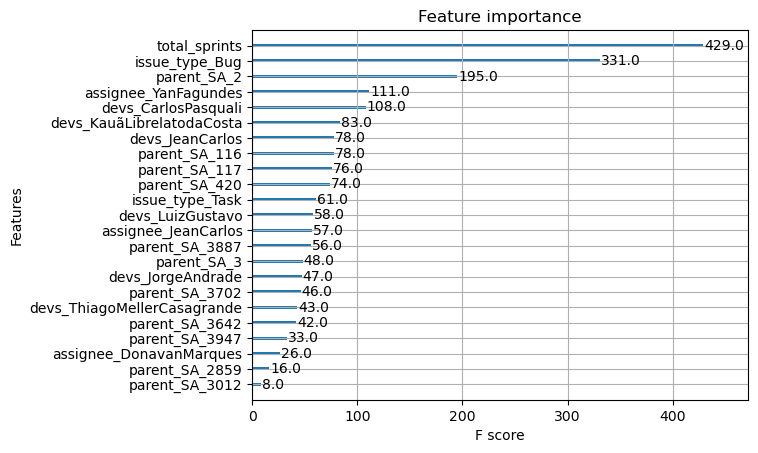

In [ ]:
plot_importance(model)

In [ ]:
score = model.score(X_treino, y_treino)
score

0.6905051311265368

In [ ]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

34

Text(0.5, 1.0, 'Tempo sprint')

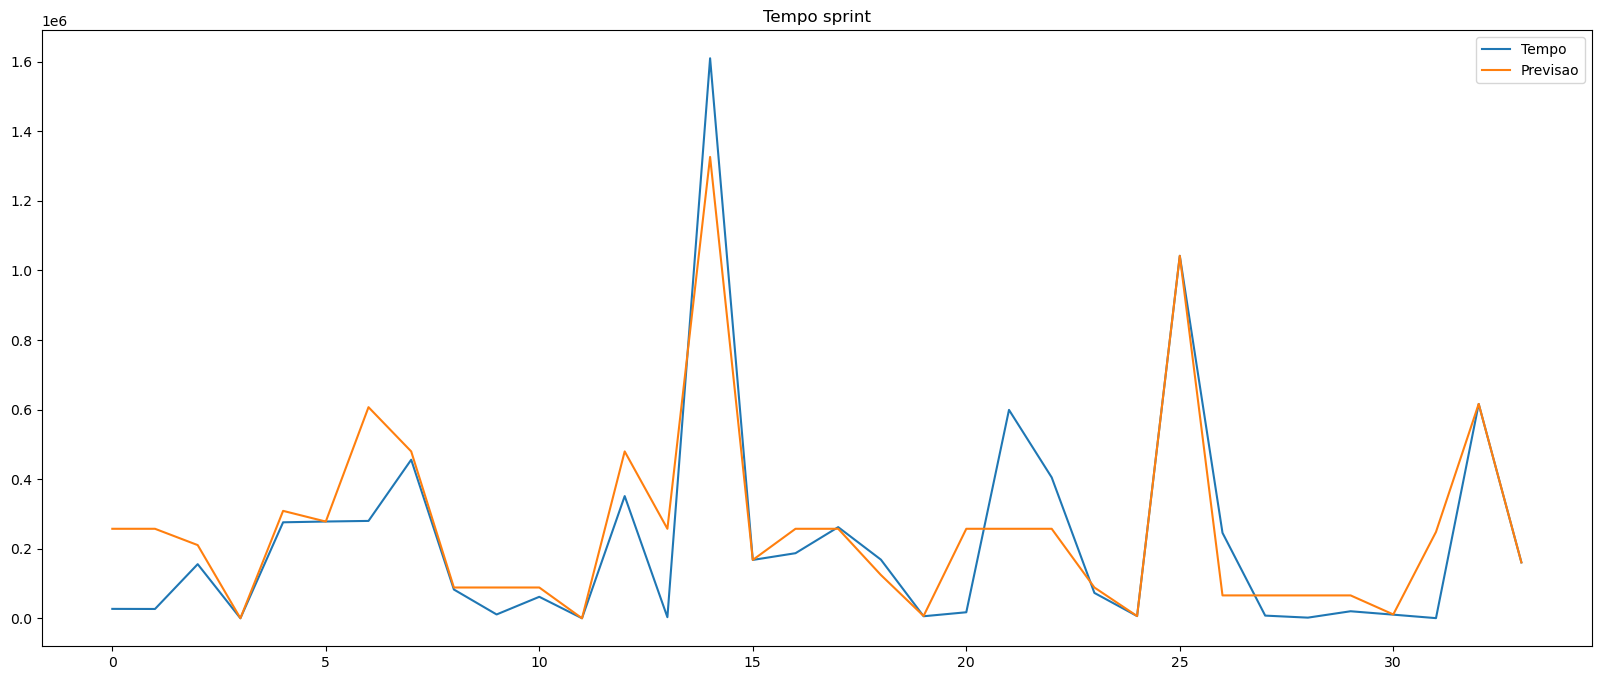

In [ ]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [ ]:
#devs_ThiagoMellerCasagrande

Text(0.5, 1.0, 'Tempo de resolução')

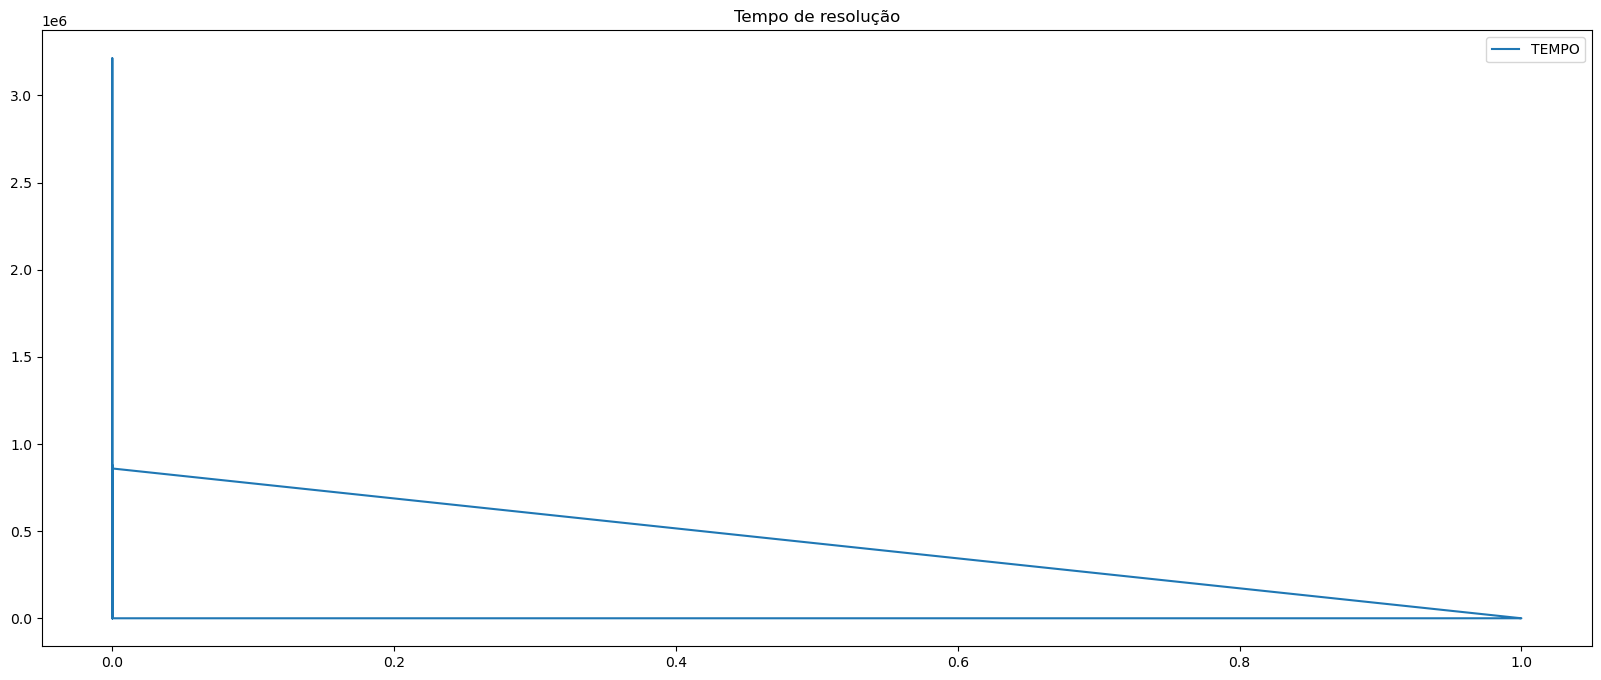

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_ThiagoMellerCasagrande'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [ ]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,parent_SA_3702,parent_SA_3887,parent_SA_3947,parent_SA_420,assignee_DonavanMarques,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.351922,0.044276,0.162621,-0.118664,-0.123625,0.323463,0.027264,0.065619,0.005410,0.140035,-0.109145,0.031017,0.052214,0.184203,-0.066465,-0.145661,0.065328,-0.152222,-0.062270,0.050165,0.149449,-0.066465,-0.037134,0.096420
tempo_resolucao,0.351922,1.000000,-0.025579,0.017780,-0.115665,-0.039653,0.062303,0.211538,-0.006651,0.008414,-0.199929,-0.105111,-0.040141,0.227990,0.260750,-0.021757,-0.189266,-0.138947,0.018138,0.003775,0.174250,-0.035867,-0.097554,0.075540,-0.212453
parent_SA_114,0.044276,-0.025579,1.000000,-0.043850,-0.056810,-0.118958,-0.026435,-0.065837,-0.034340,-0.021518,-0.061430,-0.061430,-0.026435,-0.051917,-0.067976,-0.026435,0.190757,-0.089703,-0.098965,-0.100795,0.349164,-0.080144,-0.026435,0.226303,-0.175175
parent_SA_116,0.162621,0.017780,-0.043850,1.000000,-0.066015,-0.138233,-0.030718,-0.076505,-0.039904,-0.025004,-0.071383,-0.071383,-0.030718,-0.060330,-0.078990,-0.030718,0.052338,-0.104238,-0.115000,-0.117127,-0.125586,0.547141,-0.030718,-0.079583,0.136852
parent_SA_117,-0.118664,-0.115665,-0.056810,-0.066015,1.000000,-0.179088,-0.039797,-0.099116,-0.051698,-0.032394,-0.092480,-0.092480,-0.039797,-0.078160,-0.102336,-0.039797,0.287179,0.396897,-0.148989,0.068368,-0.162704,-0.120655,-0.039797,-0.068966,0.143374
parent_SA_2,-0.123625,-0.039653,-0.118958,-0.138233,-0.179088,1.000000,-0.083333,-0.207544,-0.108253,-0.067832,-0.193649,-0.193649,-0.083333,-0.163663,-0.214286,0.222222,0.519675,-0.282778,0.731000,-0.317744,-0.276631,0.094742,0.222222,0.162704,-0.004975
parent_SA_2859,0.323463,0.062303,-0.026435,-0.030718,-0.039797,-0.083333,1.000000,-0.046121,-0.024056,-0.015074,-0.043033,-0.043033,-0.018519,-0.036370,0.388889,-0.018519,-0.138580,-0.062839,-0.069328,-0.070610,0.244600,-0.056143,-0.018519,0.158532,-0.122715
parent_SA_3,0.027264,0.211538,-0.065837,-0.076505,-0.099116,-0.207544,-0.046121,1.000000,-0.059913,-0.037542,-0.107175,-0.107175,-0.046121,-0.090579,0.840639,-0.046121,-0.265378,0.157773,-0.172662,0.360578,-0.188556,-0.139827,-0.046121,0.152797,-0.265539
parent_SA_3012,0.065619,-0.006651,-0.034340,-0.039904,-0.051698,-0.108253,-0.024056,-0.059913,1.000000,-0.019582,-0.055902,-0.055902,-0.024056,-0.047246,-0.061859,-0.024056,0.173591,-0.081631,-0.090059,0.340693,-0.098349,-0.072932,-0.024056,0.062865,-0.017234
parent_SA_3642,0.005410,0.008414,-0.021518,-0.025004,-0.032394,-0.067832,-0.015074,-0.037542,-0.019582,1.000000,-0.035028,-0.035028,-0.015074,-0.029604,-0.038761,-0.015074,-0.002014,-0.051151,-0.056432,-0.057476,-0.061627,0.268488,-0.015074,-0.095084,0.122836


In [ ]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=132
Teste=33


In [ ]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

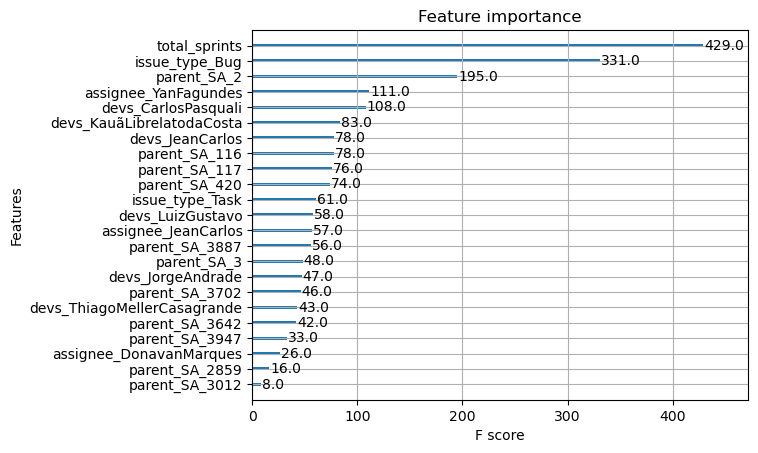

In [ ]:
plot_importance(model)

In [ ]:
score = model.score(X_treino, y_treino)
score

0.6923866329530278

In [ ]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

33

Text(0.5, 1.0, 'Tempo sprint')

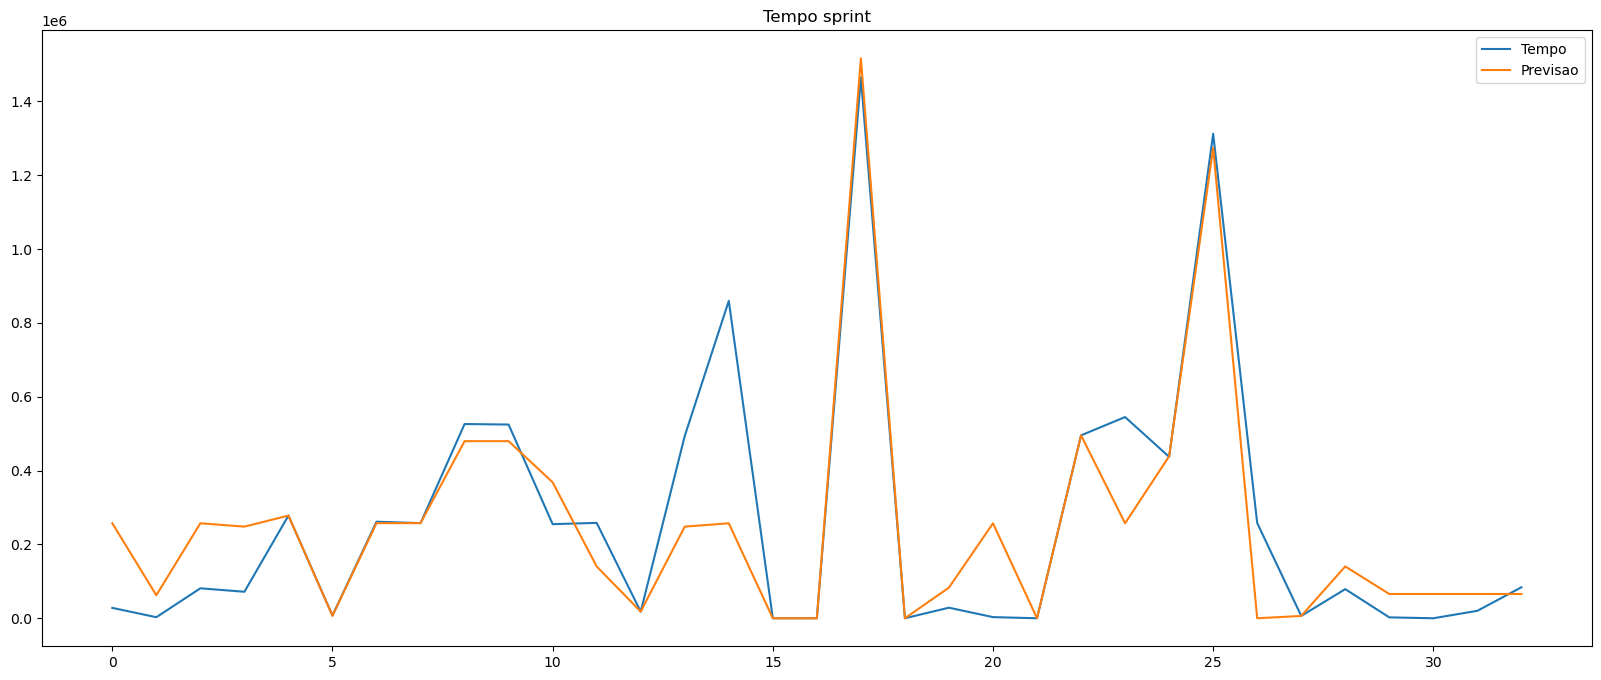

In [ ]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')